In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates

In [178]:
pd.options.display.max_rows=1000

In [179]:
accounts = pd.read_csv('account_dat.csv')
apps=pd.read_csv('app_dat.csv')
in_app_cont=pd.read_csv('in-app_dat.csv')
devices=pd.read_csv('device_ref.csv')
categories=pd.read_csv('category_ref.csv')
trans=pd.read_csv('transaction_dat.csv')

accounts.create_dt = pd.to_datetime(accounts.create_dt)
trans.create_dt = pd.to_datetime(trans.create_dt)

accounts['year_mon_install'] = pd.to_datetime(accounts.create_dt).dt.to_period('M')
trans['year_mon_trans'] = pd.to_datetime(trans.create_dt).dt.to_period('M')

#rename vars to more logical names
accounts=accounts.rename(columns={'create_dt':'install_dt'})
categories=categories.rename(columns={'category_name':'app_category'})
apps=apps.rename(columns={'content_id':'app_id'})
in_app_cont=in_app_cont.rename(columns={'parent_app_content_id':'app_id','type':'content_type'})
trans=trans.rename(columns={'device_id':'purchase_device_id', 'create_dt':'trans_dt'})

# accounts['year'] = pd.to_datetime(accounts.create_dt).dt.year

In [180]:
print(accounts.isnull().sum())
print(trans.isnull().sum())

acct_id             0
install_dt          0
payment_type        0
year_mon_install    0
dtype: int64
trans_dt              0
content_id            0
acct_id               0
price                 0
purchase_device_id    0
year_mon_trans        0
dtype: int64


In [181]:
print(accounts.shape)
accounts.head()

(100000, 4)


,acct_id,install_dt,payment_type,year_mon_install
0,eb23e449d274bddb,2012-04-03,PMOF,2012-04
1,3d60dcb8494a0d70,2009-08-31,PMOF,2009-08
2,9b6d6fbf76504d85,2008-11-06,PMOF,2008-11
3,343255370828b380,2012-01-03,PMOF,2012-01
4,664e27f05189c387,2010-10-31,PMOF,2010-10


In [182]:
accounts.acct_id.nunique()

100000

In [183]:
accounts.groupby('payment_type').payment_type.count()

payment_type
Free only    50000
PMOF         50000
Name: payment_type, dtype: int64

In [184]:
print(trans.shape)
trans.head()

(3607509, 6)


,trans_dt,content_id,acct_id,price,purchase_device_id,year_mon_trans
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1,2016-08
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2,2016-09
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2,2016-08
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2,2016-06
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2,2016-06


In [185]:
max(trans.trans_dt)

Timestamp('2016-09-21 00:00:00')

<AxesSubplot:xlabel='year_mon_install'>

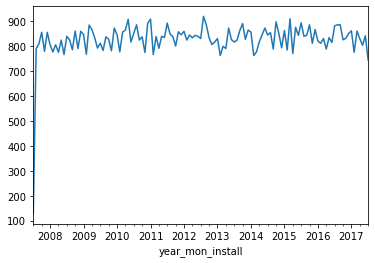

In [307]:
accounts.groupby('year_mon_install').acct_id.count().plot()

In [271]:
accounts.payment_type.unique()

array(['PMOF', 'Free only'], dtype=object)

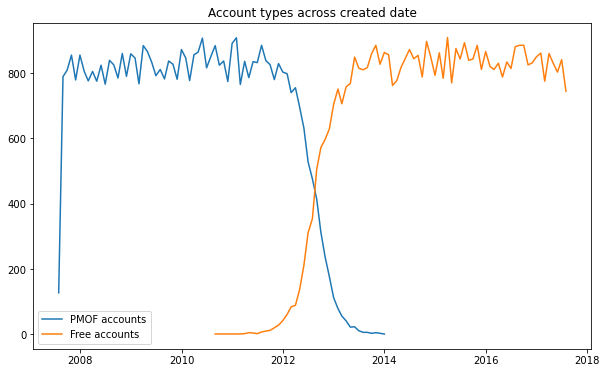

In [305]:
pd.plotting.register_matplotlib_converters()
series1_y=accounts[accounts.payment_type=='PMOF'].groupby('year_mon_install').acct_id.count().values
series1_x=accounts[accounts.payment_type=='PMOF'].groupby('year_mon_install').acct_id.count().index.values.astype('datetime64[ns]')


series2_y=accounts[accounts.payment_type=='Free only'].groupby('year_mon_install').acct_id.count().values
series2_x=accounts[accounts.payment_type=='Free only'].groupby('year_mon_install').acct_id.count().index.values.astype('datetime64[ns]') 

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(series1_x,series1_y, label='PMOF accounts')
plt.plot(series2_x,series2_y, label='Free accounts')

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.title('Account types across created date')
plt.show()

In [295]:
from functools import partial
to_datetime_fmt = partial(pd.to_datetime, format='%d/%b/%Y:%H:%M:%S %z')
series1_x.apply(to_datetime_fmt)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [188]:
accounts.acct_id.nunique()

100000

In [189]:
len(accounts.acct_id)

100000

In [190]:
trans.acct_id.nunique()

30000

<AxesSubplot:xlabel='year_mon_trans'>

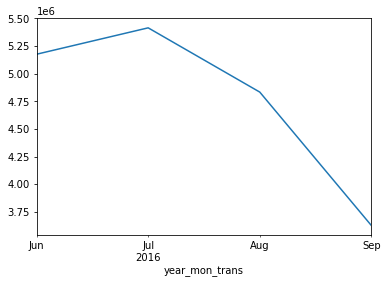

In [192]:
trans.groupby('year_mon_trans').price.sum().plot()

### Map transactions to app_id and installs

In [193]:
trans.content_id.nunique()

2913

In [194]:
trans.acct_id.nunique()

30000

In [195]:
trans_dev=pd.merge(trans,devices,left_on='purchase_device_id',right_on='device_id',how='left')\
.drop(['device_id','purchase_device_id'],axis=1)\
.rename(columns={'device_name':'purchase_device_name'})

trans_dev.head()

,trans_dt,content_id,acct_id,price,year_mon_trans,purchase_device_name
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad


In [196]:
print(trans.content_id.nunique())
print(in_app_cont.content_id.nunique())

2913
2376


In [197]:
trans_content_ids=set(trans.content_id.unique())
app_dat_content_ids=set(in_app_cont.content_id.unique())
len(trans_content_ids & app_dat_content_ids)

2376

In [198]:
2913-2376

537

In [199]:
print(trans.shape)


(3607509, 6)


In [200]:
print(in_app_cont.shape)
in_app_cont.head()

(2376, 3)


,app_id,content_id,content_type
0,d2bde35599e0dae9,227227a77c59809b,consumable
1,d2bde35599e0dae9,41ac2362a2600185,consumable
2,d2bde35599e0dae9,64a8e16f030bb611,consumable
3,d2bde35599e0dae9,2c8ba424183afa7c,consumable
4,d2bde35599e0dae9,b4c42fa5cc420f7b,consumable


In [201]:
in_app_cont.groupby('content_type').content_type.count()

content_type
consumable      2107
subscription     269
Name: content_type, dtype: int64

In [202]:
in_app_cont.app_id.nunique()

476

In [203]:
in_app_cont.content_id.nunique()

2376

In [204]:
categories

,app_category,category_id
0,Games,Z-1
1,Social Networking,Q-5
2,Utilities,M-7
3,Entertainment,Q-1
4,Photos & Videos,Y-8


In [205]:
devices

,device_name,device_id
0,iPhone,1
1,iPad,2
2,Both,3


In [206]:
print(apps.shape)
apps.head()

(1000, 4)


,app_name,app_id,category_id,device_id
0,half-slouched having,22dfac9721b899cb,Y-8,3
1,lift whale-ships,7c645810cd7f166e,M-7,3
2,mightily community,c495bcb878faffaa,Y-8,2
3,session: too--shall,4e683dcd461cdd22,Y-8,1
4,That Zoology,6473dd29a2badbf1,Y-8,3


In [207]:
apps.app_id.nunique()

1000

In [208]:
print("apps_shape: "+str(apps.shape))
app_categ=pd.merge(apps,categories,on='category_id',how='left').drop('category_id',axis=1)
# app_categ.head()
print("app_categ_shape: "+str(app_categ.shape))
app_categ_dev=pd.merge(app_categ,devices,on='device_id',how='left').drop('device_id',axis=1)
print("app_categ_dev_shape: "+str(app_categ_dev.shape))
app_categ_dev.head()
app_master=pd.merge(app_categ_dev,in_app_cont,on='app_id',how='left')
print("app_master_shape: "+str(app_master.shape))
app_master.head()

apps_shape: (1000, 4)
app_categ_shape: (1000, 4)
app_categ_dev_shape: (1000, 4)
app_master_shape: (2900, 6)


,app_name,app_id,app_category,device_name,content_id,content_type
0,half-slouched having,22dfac9721b899cb,Photos & Videos,Both,f049e141e84edd84,consumable
1,lift whale-ships,7c645810cd7f166e,Utilities,Both,ef891bdc2d651c70,consumable
2,mightily community,c495bcb878faffaa,Photos & Videos,iPad,107aece323e389df,consumable
3,mightily community,c495bcb878faffaa,Photos & Videos,iPad,77389dc3f8108c77,consumable
4,session: too--shall,4e683dcd461cdd22,Photos & Videos,iPhone,abfa638eb85a98f3,consumable


In [209]:
app_master.content_id.isnull().sum()

524

In [210]:
app_master.isnull().sum()

app_name          0
app_id            0
app_category      0
device_name       0
content_id      524
content_type    524
dtype: int64

In [211]:
trans_master = pd.merge(trans_dev,app_master,on='content_id',how='left')
trans_master.head()

,trans_dt,content_id,acct_id,price,year_mon_trans,purchase_device_name,app_name,app_id,app_category,device_name,content_type
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone,events Bildad's,61cea77b9bc843d1,Utilities,Both,subscription
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad,swell questionably,1f0ebd67df5846cd,Utilities,Both,consumable
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad,supperless--my Shipmates,1383e4f2f49f0f44,Games,iPad,consumable
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad,unwritten hungry,8590a25d4e5c249c,Games,iPad,consumable
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad,Turning thanked,478e10f9248b7842,Entertainment,Both,consumable


In [212]:
print("trans_shape: "+str(trans_dev.shape))
print("trans_master_shape: "+str(trans_master.shape))
trans_master.isnull().sum()

trans_shape: (3607509, 6)
trans_master_shape: (3607509, 11)


trans_dt                      0
content_id                    0
acct_id                       0
price                         0
year_mon_trans                0
purchase_device_name          0
app_name                1594364
app_id                  1594364
app_category            1594364
device_name             1594364
content_type            1594364
dtype: int64

In [213]:
len(trans_master.content_id[trans_master.app_id.isnull()].unique())

537

In [214]:
master = pd.merge(trans_master, accounts , on = 'acct_id', how='left')
master['age_on_pltfm']=(master.trans_dt-master.install_dt).dt.days
master.head()

,trans_dt,content_id,acct_id,price,year_mon_trans,purchase_device_name,app_name,app_id,app_category,device_name,content_type,install_dt,payment_type,year_mon_install,age_on_pltfm
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,2016-08,iPhone,events Bildad's,61cea77b9bc843d1,Utilities,Both,subscription,2009-08-29,PMOF,2009-08,2556.0
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2016-09,iPad,swell questionably,1f0ebd67df5846cd,Utilities,Both,consumable,2011-05-28,PMOF,2011-05,1938.0
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2016-08,iPad,supperless--my Shipmates,1383e4f2f49f0f44,Games,iPad,consumable,2009-11-15,PMOF,2009-11,2465.0
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2016-06,iPad,unwritten hungry,8590a25d4e5c249c,Games,iPad,consumable,2009-03-01,PMOF,2009-03,2665.0
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2016-06,iPad,Turning thanked,478e10f9248b7842,Entertainment,Both,consumable,2010-10-01,PMOF,2010-10,2082.0


In [215]:
print("trans_master_shape: "+str(trans_master.shape))
print("master_shape: "+str(master.shape))
master.isnull().sum()

trans_master_shape: (3607509, 11)
master_shape: (3607509, 15)


trans_dt                      0
content_id                    0
acct_id                       0
price                         0
year_mon_trans                0
purchase_device_name          0
app_name                1594364
app_id                  1594364
app_category            1594364
device_name             1594364
content_type            1594364
install_dt                 2742
payment_type               2742
year_mon_install           2742
age_on_pltfm               2742
dtype: int64

<AxesSubplot:>

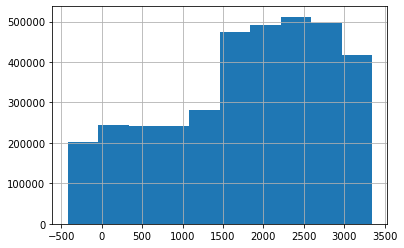

In [216]:
master.age_on_pltfm.hist()

In [217]:
master[master.age_on_pltfm==min(master.age_on_pltfm)]

,trans_dt,content_id,acct_id,price,year_mon_trans,purchase_device_name,app_name,app_id,app_category,device_name,content_type,install_dt,payment_type,year_mon_install,age_on_pltfm
1761065,2016-06-01,ee4e8290e7622e10,13e4043e21525dbd,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
1937663,2016-06-01,9f3b8e21ac88b08c,ab1f7ce5d58680b6,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2091194,2016-06-01,7d3cf8d98c978872,3ca3ff0bc5017c61,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2387417,2016-06-01,7d3cf8d98c978872,13e4043e21525dbd,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2442854,2016-06-01,6cbac0eb5f13ccad,ab1f7ce5d58680b6,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2475584,2016-06-01,b5802f5ce77ebba0,dc184fe79964d2fe,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2659210,2016-06-01,dcdf2cc989b54026,d5c703616113bb1e,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2664808,2016-06-01,91479df1338e1bdf,13e4043e21525dbd,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
2776404,2016-06-01,810eff5ec2247baa,d5c703616113bb1e,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0


In [231]:
accounts[accounts.acct_id=='13e4043e21525dbd']

,acct_id,install_dt,payment_type,year_mon_install
69150,13e4043e21525dbd,2017-07-27,Free only,2017-07


In [236]:
master[master.acct_id=='13e4043e21525dbd']

,trans_dt,content_id,acct_id,price,year_mon_trans,purchase_device_name,app_name,app_id,app_category,device_name,content_type,install_dt,payment_type,year_mon_install,age_on_pltfm
1753135,2016-06-29,5e076c64fb082ea5,13e4043e21525dbd,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-393.0
1761065,2016-06-01,ee4e8290e7622e10,13e4043e21525dbd,0.0,2016-06,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-421.0
1783762,2016-06-15,0ffd63aaa247ca96,13e4043e21525dbd,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-407.0
1788194,2016-06-20,663ed56ad24ba1cc,13e4043e21525dbd,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-402.0
1792654,2016-08-02,9a112b454fa4cac4,13e4043e21525dbd,0.0,2016-08,iPad,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-359.0
1795023,2016-08-27,fb9068af35feafb7,13e4043e21525dbd,0.0,2016-08,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-334.0
1803638,2016-08-31,f2d4dd06e9267e20,13e4043e21525dbd,0.0,2016-08,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-330.0
1810142,2016-06-28,4f2a87ca0bbdf07b,13e4043e21525dbd,0.0,2016-06,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-394.0
1815542,2016-07-07,4b148e0b46a794c6,13e4043e21525dbd,0.0,2016-07,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-385.0
1872720,2016-08-13,4b74cef33e782fda,13e4043e21525dbd,0.0,2016-08,iPhone,NaN,NaN,NaN,NaN,NaN,2017-07-27,Free only,2017-07,-348.0


<AxesSubplot:>

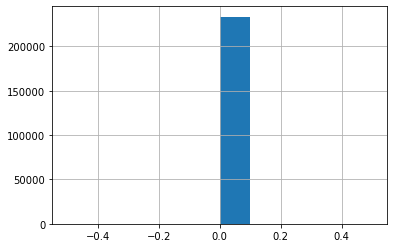

In [232]:
master.price[master.age_on_pltfm<0].hist()

In [242]:
# mpl.rcParams['agg.path.chunksize'] = 1000000

master[(master.payment_type!='PMOF') & (master.price>0)].price

1208        2.99
2511        3.99
2714       12.99
3335        8.99
4216       14.99
           ...  
3597503    11.99
3601223     4.99
3602626    10.99
3605113    25.99
3606374    20.99
Name: price, Length: 1540, dtype: float64

<AxesSubplot:xlabel='age_on_pltfm'>

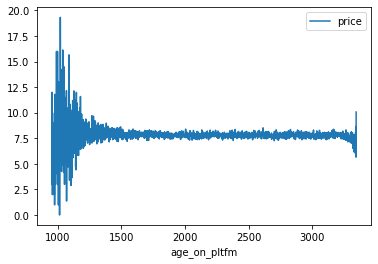

In [223]:
# mpl.rcParams['agg.path.chunksize'] = 1000000

master[(master.age_on_pltfm>=0) & (master.payment_type=='PMOF')].groupby('age_on_pltfm').mean('price').plot()

<AxesSubplot:xlabel='year_mon_install'>

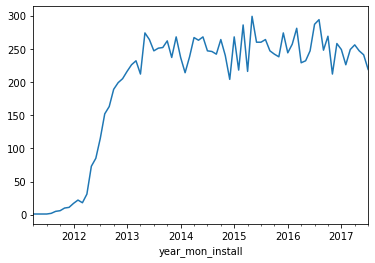

In [239]:
# master[(master.age_on_pltfm>=0) & (master.payment_type=='PMOF')].groupby('year_mon_install').price.mean().plot()

master[(master.payment_type!='PMOF')].groupby('year_mon_install').acct_id.nunique().plot()

<AxesSubplot:xlabel='year_mon_trans'>

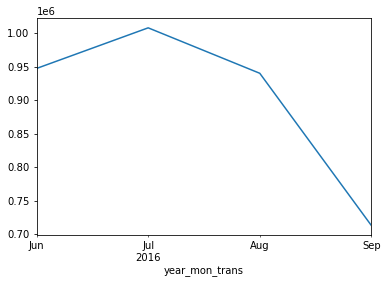

In [221]:
# master.head()
master.groupby('year_mon_trans').acct_id.count().plot()

In [ ]:
master.acct_id.nunique()

In [ ]:
sum(master.price==0)/len(master.price)


In [ ]:
master.groupby('payment_type').payment_type.count()

In [ ]:
master.acct_id[master.payment_type=='Free only'].nunique()/master.acct_id.nunique()

In [ ]:
1167271/2437496